#                      A Web based Skin Disease Prediction using Convolutional Neural Network


This notebook is divided into 10 major steps which are as follows:

1. [Project description](#data-desc)
2. [Importing Libraries & setting up environment](#imp-lib)
3. [Loading dataset](#data-load)
4. [Data Cleaning & Preprocessing](#data-prep)
5. [Data Augmentation](#data-aug)
6. [Graphical Representation](#data-gr)
7. [Training & Test Split](#data-train)
8. [Building CNN Model](#CNN)
9. [Initital Training](#data-tr)
10. [Final Model](#Final)

## 1.Project Introduction<a id='data-desc'></a>


Skin diseases are highly transmissible and a major public health concern. It significantly affects the patient's appearance and mental health. In order to prevent them from spreading and to ensure that the identified condition receives the right care, skin disorders should be identified early on. The common causes of skin illnesses are viruses, germs, allergies, and fungi. The development of scientific and medical technologies, such as photonics and lasers, has made it possible to identify skinillnesses accurately and swiftly. The patient must make the lengthy trip to the hospital, which is its lone drawback due to its high cost. Artificial intelligence is currently being considered for the purpose of identifying skin illnesses through the use of deep learning algorithms and the extensive data sets found in hospitals and health centers.

Our work is to  identifies 7 types of skin diseases, which are: 
<br>
<br>
 Actinic keratoses <br>
 Basal cell carcinoma <br>
 Benign keratosis-like lesions <br>
 Dermatofibroma <br>
 Melanocytic nevi <br>
 Melanoma <br>
 Vascular lesions<br>


## 2. Importing Libraries<a id='imp-lib'></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

## 3. Loading Dataset<a id='data-load'></a>

In [2]:
import pandas as pd
data = pd.read_csv('./archive/hmnist_28_28_RGB.csv')

Lets see some of the sample entries of dataset

In [3]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


# 4. Data Pre-processing <a id='data-prep'></a>

In [4]:
data.isna()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10011,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
y = data['label']
x = data.drop(columns = ['label'])

In [6]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' Vascular lesions'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

# 5. Data Augmentation <a id='data-aug'></a>

In [7]:
tabular_data = pd.read_csv('./archive/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


# 6.  Graphical Representation <a id='data-gr'></a>

Text(0.5, 1.0, 'Frequency Distribution of Classes')

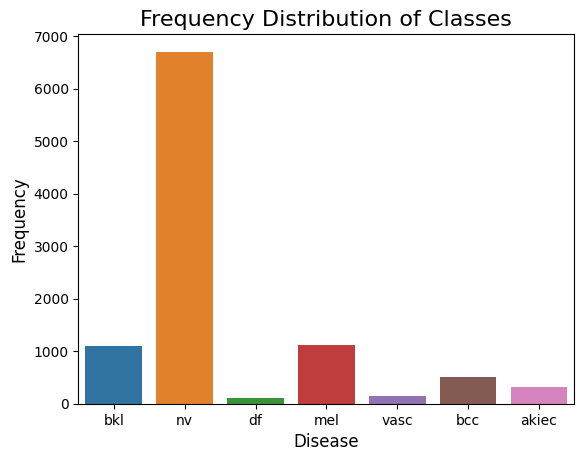

In [8]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

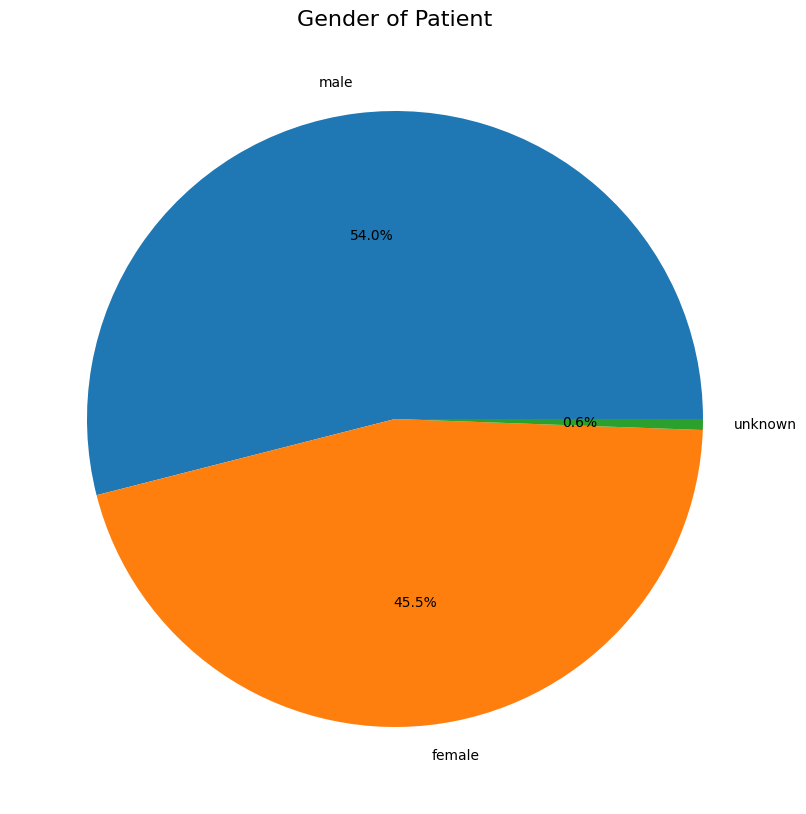

In [9]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

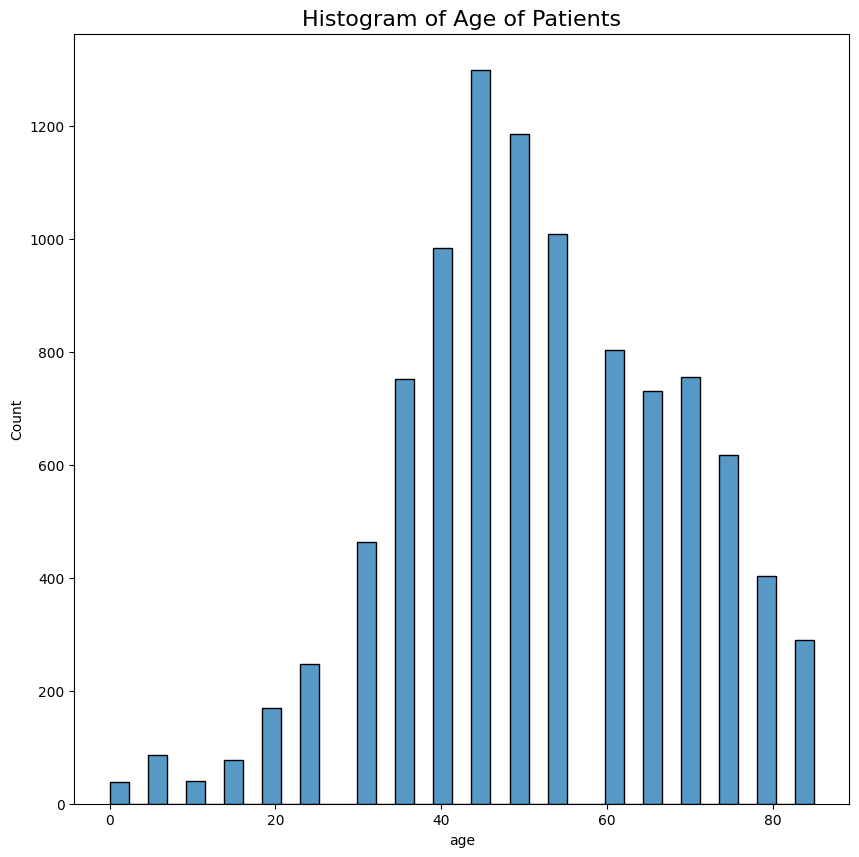

In [10]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

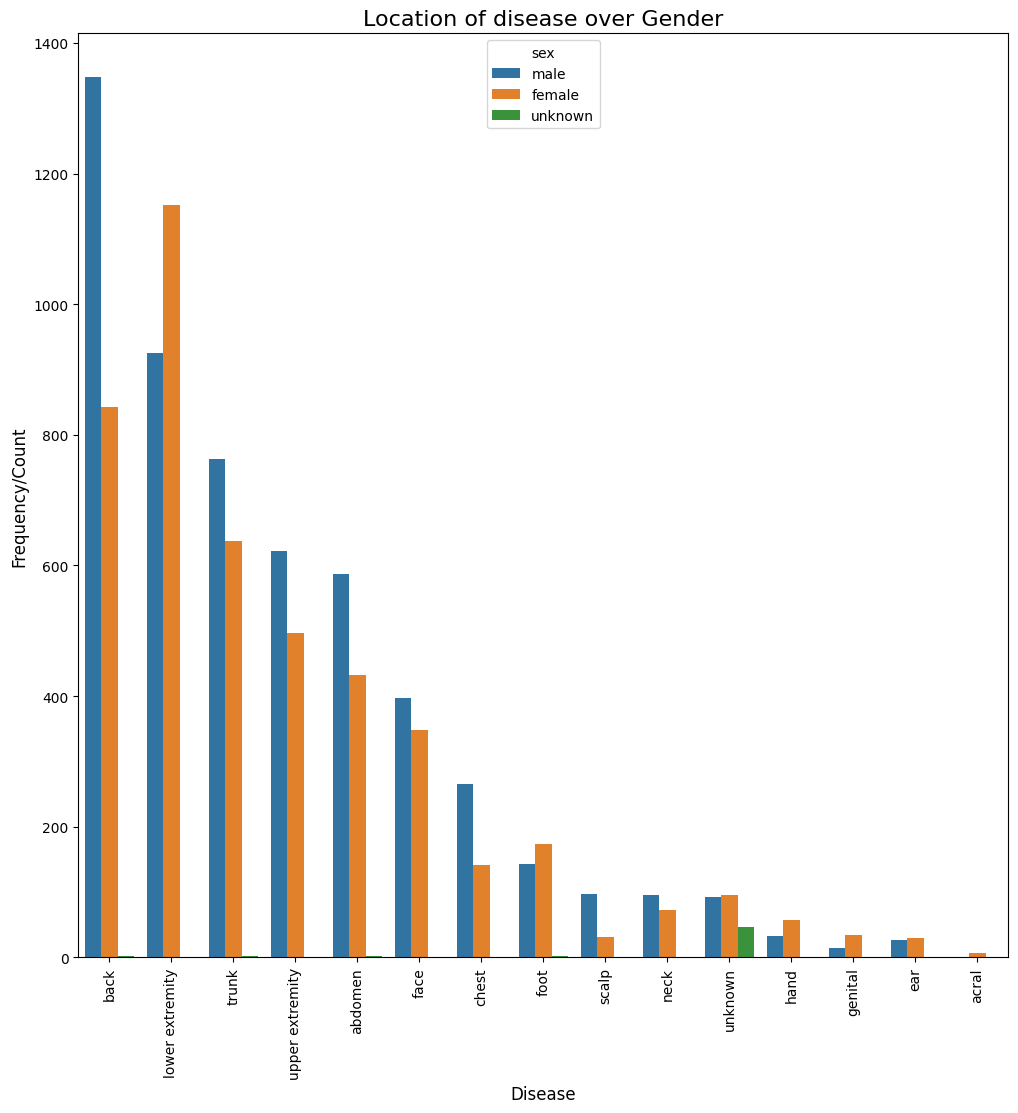

In [11]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [12]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


# 7. Generating Train and Test Splits <a id='data-train'></a>

In [13]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# 8. Developing CNN Model <a id="CNN"></a>

In [14]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [15]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', mode='max', verbose=1)

# 9. Initial Training <a id='data-tr'></a>

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 [==============================] - ETA: 0s - loss: 1.2607 - accuracy: 0.5069
Epoch 00001: saving model to best_model.h5
235/235 [==============================] - 52s 220ms/step - loss: 1.2607 - accuracy: 0.5069 - val_loss: 0.8692 - val_accuracy: 0.6760
Epoch 2/20
235/235 [==============================] - ETA: 0s - loss: 0.7016 - accuracy: 0.7421
Epoch 00002: saving model to best_model.h5
235/235 [==============================] - 49s 207ms/step - loss: 0.7016 - accuracy: 0.7421 - val_loss: 0.6068 - val_accuracy: 0.7718
Epoch 3/20
235/235 [==============================] - ETA: 0s - loss: 0.4622 - accuracy: 0.8335
Epoch 00003: saving model to best_model.h5
235/235 [==============================] - 54s 229ms/step - loss: 0.4622 - accuracy: 0.8335 - val_loss: 0.3809 - val_accuracy: 0.8654
Epoch 4/20
235/235 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.8812
Epoch 00004: saving model to best_model.h5
235/235 [==============================] -

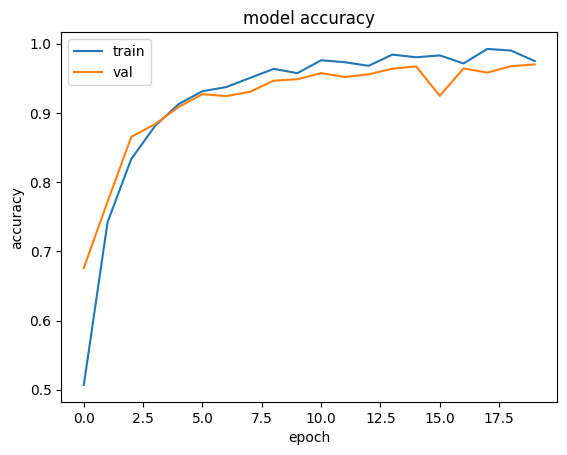

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

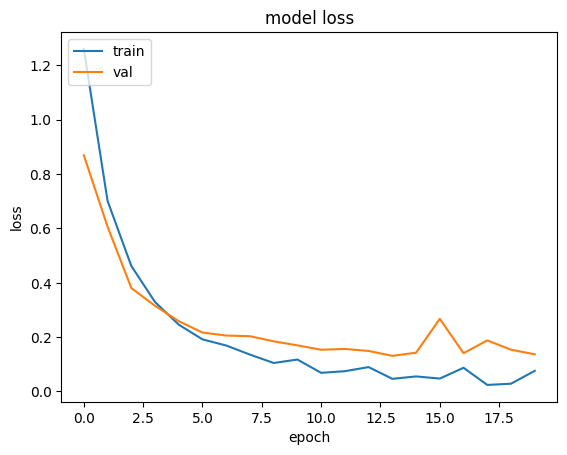

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 10. Final Model <a id="Final"></a>
### Entire data till now is trained and test that has been loaded into best_model.h5 file. That .h5 file has been used in created web application.

In [19]:
model.load_weights('best_model.h5')

# Generating Accuracy of our Model

In [29]:
from math import *
loss, acc = model.evaluate(X_test, Y_test, verbose=2)
acc  *= 100
print("Generated Accuracy = ",ceil(acc))

294/294 - 3s - loss: 0.1381 - accuracy: 0.9669
Generated Accuracy =  97
